## Invoking the SEVIR Nowcast API using FastAPI web-framework

In [2]:
# Import libraries
from IPython.display import Image
import requests

#### Invoke API function

In [3]:
# Invoke function
def invoke_api(params_test):
    nowcast_test = requests.post(f"http://127.0.0.1:8000/nowcast/", json = params_test)
    # JSON output
    # Response
    sevir_output_test = nowcast_test.json()   
    if 'nowcast_error' in sevir_output_test.keys():
        return {'nowcast_error': sevir_output_test['nowcast_error']}
    else:
        # H5 file output path
        print("Path for nowcasted output in h5 file:\n", sevir_output_test['nowcast_path'])
        # GIF file output path
        print("Path for nowcasted output in GIF format:\n", sevir_output_test['gif_path'])
        # Display GIF
        return Image(open(sevir_output_test['gif_path'], 'rb').read())

##### Samples which generate output

Path for nowcasted output in h5 file:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\nowcast_output_37.318363_-84.224203.h5
Path for nowcasted output in GIF format:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\latest_nowcast_display_37.318363_-84.224203.gif


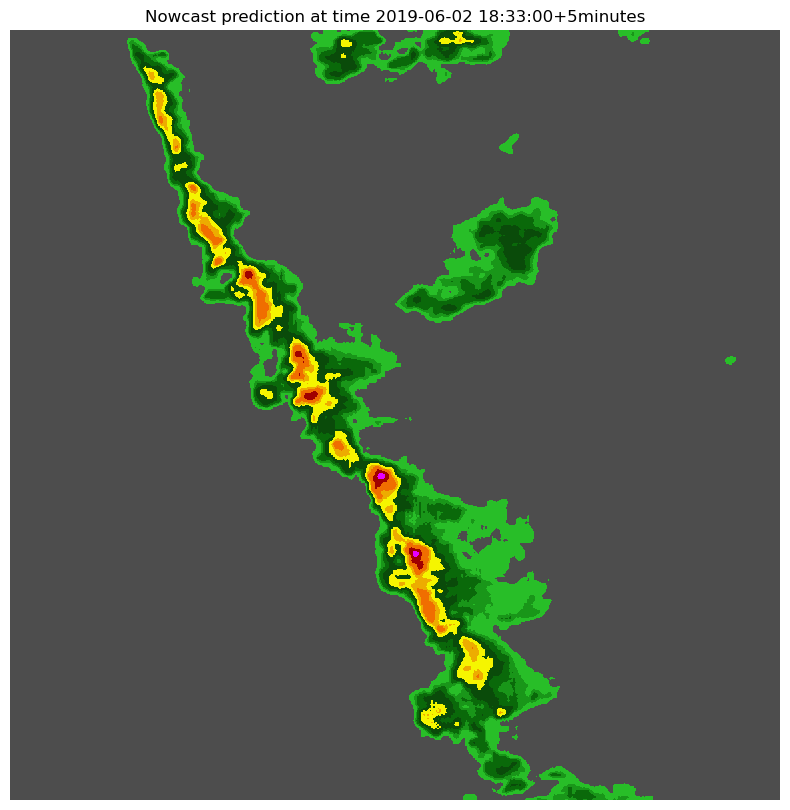

In [4]:
# Test case-1
params_test1 = { 
 "lat":37.318363,
 "lon":-84.224203, 
 "radius":200,
 "time_utc":"2019-06-02 18:33:00",
 "model_type":"gan",
 "closest_radius":"True"
}

invoke_api(params_test1)

Path for nowcasted output in h5 file:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\nowcast_output_30.54711887_-92.28496258.h5
Path for nowcasted output in GIF format:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\latest_nowcast_display_30.54711887_-92.28496258.gif


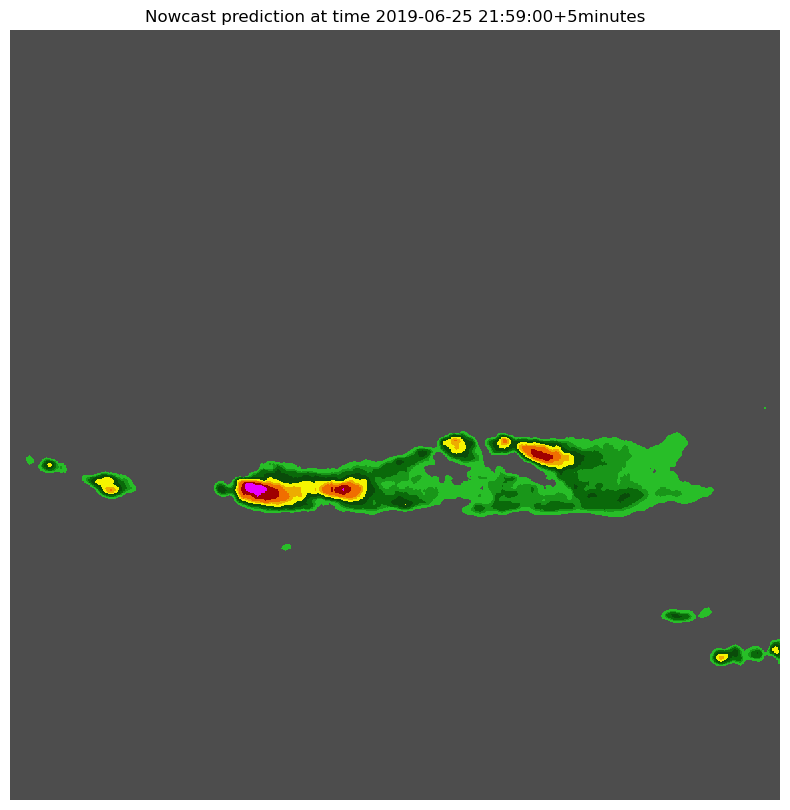

In [5]:
# Test case-2
params_test2 = {
 "lat":30.54711887,
 "lon":-92.28496258,
 "radius":200,
 "time_utc":"2019-06-25 21:59:00",
 "model_type":"gan",
 "closest_radius":"True"
}

invoke_api(params_test2)

Path for nowcasted output in h5 file:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\nowcast_output_35.9093752_-100.2650416.h5
Path for nowcasted output in GIF format:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\latest_nowcast_display_35.9093752_-100.2650416.gif


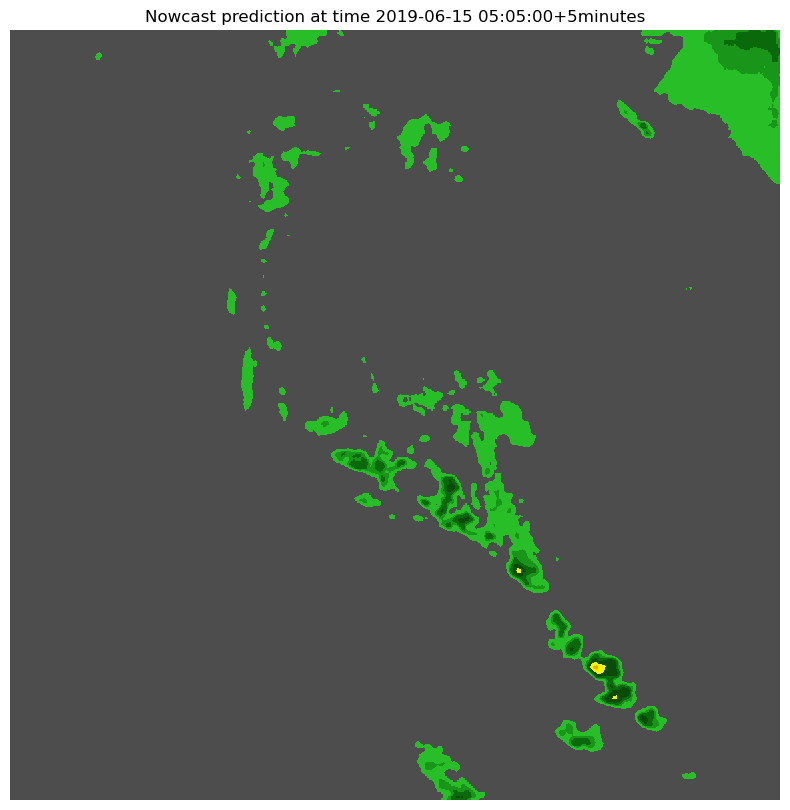

In [6]:
# Test case-3
params_test3 = {
 "lat":35.9093752,
 "lon":-100.2650416,
 "radius":200,
 "time_utc":"2019-06-15 05:05:00",
 "model_type":"gan",
 "closest_radius":"True"
}

invoke_api(params_test3)

Path for nowcasted output in h5 file:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\nowcast_output_44.59984523_-100.3962065.h5
Path for nowcasted output in GIF format:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\latest_nowcast_display_44.59984523_-100.3962065.gif


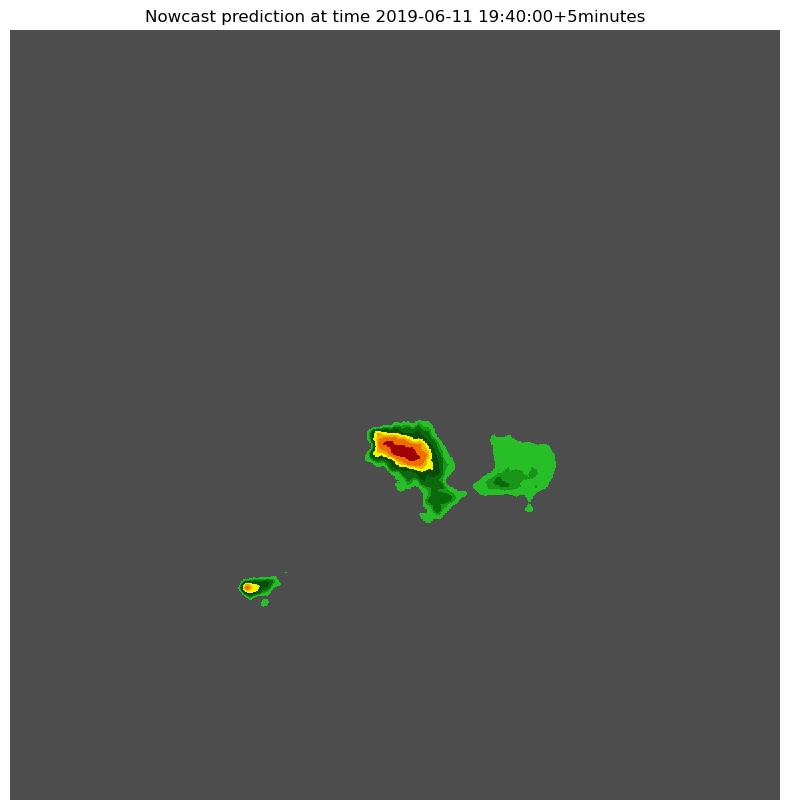

In [7]:
# Test case-4
params_test4 = {
 "lat":44.59984523,
 "lon":-100.3962065,
 "radius":200,
 "time_utc":"2019-06-11 19:40:00",
 "model_type":"gan",
 "closest_radius":"True"
}

invoke_api(params_test4)

Path for nowcasted output in h5 file:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\nowcast_output_30.58070007_-91.57206541.h5
Path for nowcasted output in GIF format:
 C:\Users\krish\Documents\Northeastern University\Spring22\DAMG 7245\Assignment-4\output\latest_nowcast_display_30.58070007_-91.57206541.gif


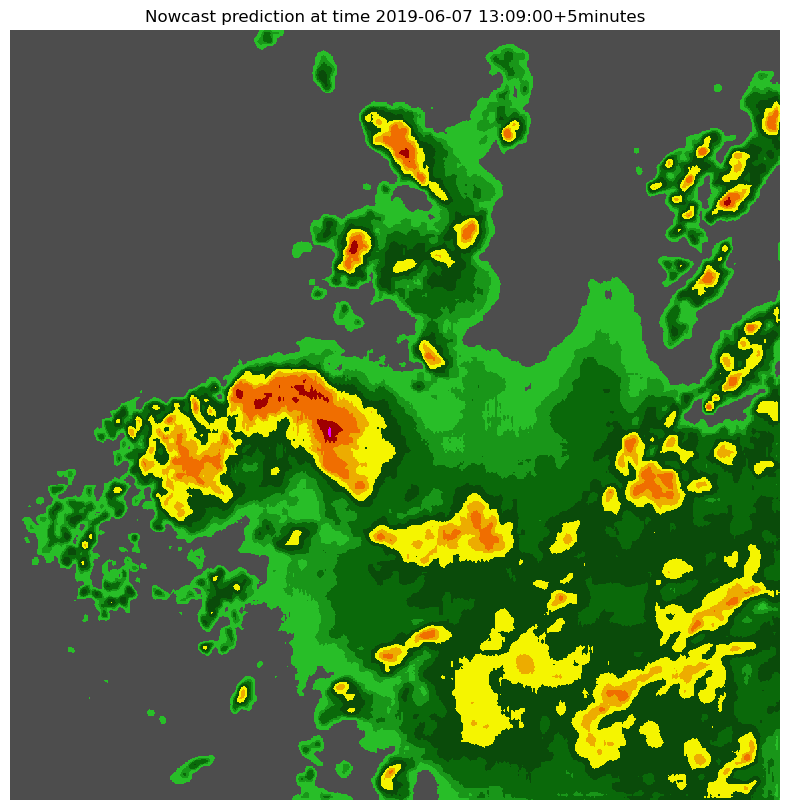

In [8]:
# Test case-5
params_test5 = {
 "lat":30.58070007,
 "lon":-91.57206541,
 "radius":200,
 "time_utc":"2019-06-07 13:09:00",
 "model_type":"gan",
 "closest_radius":"True"
}

invoke_api(params_test5)

##### Samples which generate proper exceptions

In [9]:
# Test case-6 : Increase radius
params_test6 = { 
 "lat":37.318363,
 "lon":-84.224203, 
 "radius":100,
 "time_utc":"2019-06-02 18:33:00",
 "model_type":"gan",
 "closest_radius":"False"
}

invoke_api(params_test6)

{'nowcast_error': 'Catalog Error: Requested location not present in the given radius. Try increasing the radius or set closest_radius=True in the query'}

In [10]:
# Test case-7 : 'GAL' Model not found
params_test7 = { 
 "lat":37.318363,
 "lon":-84.224203, 
 "radius":200,
 "time_utc":"2019-06-02 18:33:00",
 "model_type":"gal",
 "closest_radius":"True"
}

invoke_api(params_test7)

{'nowcast_error': 'Model Error: Model file gal does not exist'}

In [11]:
# Test case-8 : Coordinates very far away from US, from a diff country
params_test8 = { 
 "lat":28.7041,
 "lon":77.1025, 
 "radius":500,
 "time_utc":"2019-06-02 18:33:00",
 "model_type":"gal",
 "closest_radius":"False"
}

invoke_api(params_test8)

{'nowcast_error': 'Catalog Error: Requested location not present in the given radius. Try increasing the radius or set closest_radius=True in the query'}

In [13]:
# Test case-9 : Radius = 0 
params_test9 = { 
 "lat":37.318363,
 "lon":-84.224203, 
 "radius":0,
 "time_utc":"2019-06-02 18:33:00",
 "model_type":"gan",
 "closest_radius":"False"
}

invoke_api(params_test9)

{'nowcast_error': 'Catalog Error: Requested location not present in the given radius. Try increasing the radius or set closest_radius=True in the query'}

In [14]:
# Test case-10 : Empty field for closest_radius
params_test10 = { 
 "lat":37.318363,
 "lon":-84.224203, 
 "radius":200,
 "time_utc":"2019-06-02 18:33:00",
 "model_type":"gan",
 "closest_radius":""
}

invoke_api(params_test10)

{'nowcast_error': 'closest_radius should be either "True" or "False". Please check the letter case carefully.'}